In [1]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
filepath = r'datasets\CC GENERAL.csv'
df = pd.read_csv(filepath)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#this code is no needed for this exercise, just for reference: show multiple columns
df[['CUST_ID','BALANCE']]

,CUST_ID,BALANCE
0,C10001,40.900749
1,C10002,3202.467416
2,C10003,2495.148862
3,C10004,1666.670542
4,C10005,817.714335
5,C10006,1809.828751
6,C10007,627.260806
7,C10008,1823.652743
8,C10009,1014.926473
9,C10010,152.225975


In [4]:
df.count()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

In [5]:
#fill the empty CREDIT_LIMIT with the mean of CREDIT_LIMIT grouped by TENURE
#DON'T FORGET 'inplace=True'
df['CREDIT_LIMIT'].fillna(df.groupby(['TENURE'])['CREDIT_LIMIT'].transform('mean'),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df.groupby(['TENURE'])['MINIMUM_PAYMENTS'].transform('mean'),inplace=True)
df.count()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

In [6]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
df_model = df[['CUST_ID','BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','TENURE']]
df_model.head()

,CUST_ID,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C10001,40.900749,95.40,0.000000,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,6442.945483,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,0.000000,7500.0,622.066742,627.284787,12
3,C10004,1666.670542,1499.00,205.788017,7500.0,0.000000,913.155148,12
4,C10005,817.714335,16.00,0.000000,1200.0,678.334763,244.791237,12


In [8]:
#df_model['TENURE'] = df_model['TENURE'].map({6:0,7:1,8:2,9:3,10:4,11:5,12:6})
#df_model

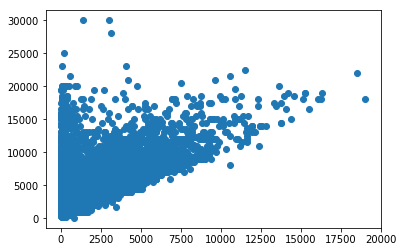

In [9]:
#plot data points to visually see where they are
#df['PURCHASES']
plt.scatter(df_model['BALANCE'],df_model['CREDIT_LIMIT'])

In [10]:
#average measurements for each TENURE
df_model.groupby('TENURE').mean()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
TENURE,,,,,,
6,1095.890702,443.941667,1438.554796,3002.561576,636.886258,340.270716
7,1003.800362,424.559421,1295.632053,2567.631579,793.778037,410.964335
8,1127.963470,468.858929,1361.858390,2973.724490,842.787393,428.156856
9,1098.752149,540.138171,1470.785130,2977.904762,967.757363,546.196474
10,1251.955773,676.631271,1303.918006,3871.610169,1127.220569,468.626654
11,1641.770893,571.222411,1363.252071,4141.232877,1568.695623,973.552999
12,1619.158166,1088.192402,908.707528,4693.331329,1853.606676,913.155148


In [11]:
#make a dataframe called X to hold the predictive features
df_model1 = df_model[['BALANCE','CREDIT_LIMIT']]
df_model1.head()

,BALANCE,CREDIT_LIMIT
0,40.900749,1000.0
1,3202.467416,7000.0
2,2495.148862,7500.0
3,1666.670542,7500.0
4,817.714335,1200.0


In [12]:
#initialize k-means function
#set number of clusters to categorize = 7
kmeans = KMeans(n_clusters=7)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(df_model1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
#data point coordinates for centroids of each cluster
print(kmeans.cluster_centers_)

[[ 2860.23778564  3936.43012761]
 [ 1095.72568522  8159.23069986]
 [ 5360.57702413  8286.56316249]
 [  510.88940642  4898.45659141]
 [ 1265.6243921  14565.27272727]
 [ 8967.82421793 13941.73387097]
 [  625.84738347  1750.15075547]]


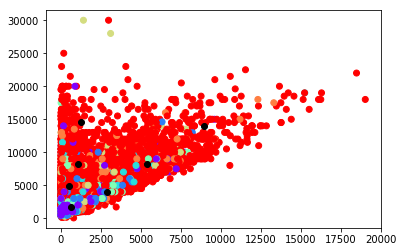

In [14]:
#scatterplot of original categories with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df_model['BALANCE'],df_model['CREDIT_LIMIT'], c=df_model['TENURE'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [15]:
#add a new column to dataframe called "cluster"
#can use this to compare features of clusters to original categories
df_model['CLUSTER'] = kmeans.labels_
df_model.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CUST_ID,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,CLUSTER
0,C10001,40.900749,95.40,0.000000,1000.0,201.802084,139.509787,12,6
1,C10002,3202.467416,0.00,6442.945483,7000.0,4103.032597,1072.340217,12,1
2,C10003,2495.148862,773.17,0.000000,7500.0,622.066742,627.284787,12,1
3,C10004,1666.670542,1499.00,205.788017,7500.0,0.000000,913.155148,12,1
4,C10005,817.714335,16.00,0.000000,1200.0,678.334763,244.791237,12,6


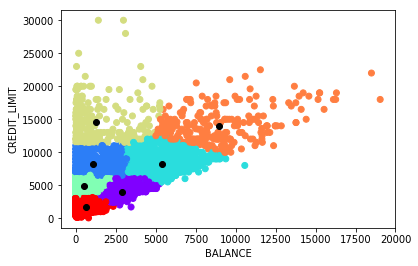

In [16]:
#plot TENURE by BALANCE vs CREDIT_LIMIT

plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')
plt.scatter(df_model['BALANCE'], df_model['CREDIT_LIMIT'], c=df_model['CLUSTER'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [17]:
#predict category of new data point
kpred = [1598.316546,4500.000000]

#model thinks new data point belongs to upper-left cluster
print(kmeans.predict([kpred]))

[3]


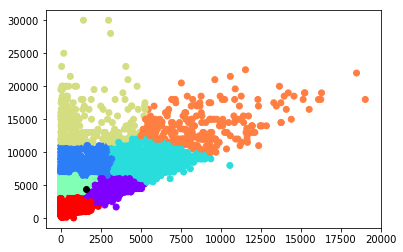

In [18]:
#see plot of new data point

#k-means predicted clusters (in color) for the data points
plt.scatter(df_model['BALANCE'],df_model['CREDIT_LIMIT'], c=df_model['CLUSTER'], cmap= 'rainbow')

#new data point is the black dot
plt.scatter(kpred[0],kpred[1],c='black')

In [19]:
df_model2 = df_model.drop(['CUST_ID','CASH_ADVANCE', 'MINIMUM_PAYMENTS','CLUSTER'], axis=1)
df_model2.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,TENURE
0,40.900749,95.40,1000.0,201.802084,12
1,3202.467416,0.00,7000.0,4103.032597,12
2,2495.148862,773.17,7500.0,622.066742,12
3,1666.670542,1499.00,7500.0,0.000000,12
4,817.714335,16.00,1200.0,678.334763,12


In [20]:
#initialize k-means function
#set number of clusters to categorize = 7
kmeans = KMeans(n_clusters=7)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(df_model2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
#data point coordinates for centroids of each cluster

print(kmeans.cluster_centers_)

[[7.71159073e+02 4.85219295e+02 2.07278205e+03 8.56681745e+02
  1.13550078e+01]
 [9.90508914e+02 1.53839340e+03 1.24254157e+04 1.98519094e+03
  1.16817102e+01]
 [5.38523404e+03 3.75866874e+03 1.25168421e+04 1.72476961e+04
  1.17894737e+01]
 [2.14248099e+03 3.67981906e+03 6.50358559e+03 6.43575792e+03
  1.18760908e+01]
 [1.84209225e+03 8.89506990e+02 6.14040636e+03 1.33913426e+03
  1.17146802e+01]
 [5.35154611e+03 2.70853092e+04 1.63600000e+04 2.71590435e+04
  1.19200000e+01]
 [7.31142847e+03 1.47852947e+03 1.10489237e+04 2.63622797e+03
  1.17064579e+01]]


Text(0, 0.5, 'PAYMENTS')

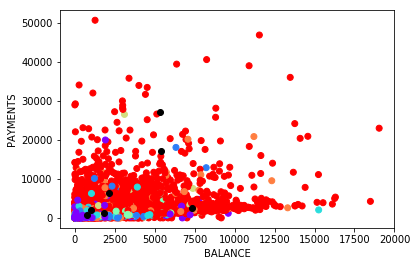

In [22]:
#scatterplot of PURCHASES AND CREDIT_LIMIT with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df_model2['BALANCE'], df_model2['PAYMENTS'], c=df_model2['TENURE'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,3], c='black')

plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')

Text(0, 0.5, 'CREDIT_LIMIT')

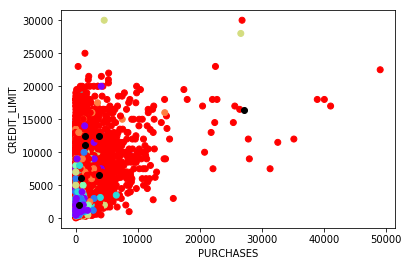

In [23]:
#scatterplot of PURCHASES AND CREDIT_LIMIT with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df_model2['PURCHASES'], df_model2['CREDIT_LIMIT'], c=df_model2['TENURE'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='black')

plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')

In [24]:
df_model2['CLUSTERS'] = kmeans.labels_
df_model2.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,TENURE,CLUSTERS
0,40.900749,95.40,1000.0,201.802084,12,0
1,3202.467416,0.00,7000.0,4103.032597,12,4
2,2495.148862,773.17,7500.0,622.066742,12,4
3,1666.670542,1499.00,7500.0,0.000000,12,4
4,817.714335,16.00,1200.0,678.334763,12,0


In [26]:
df_model2['CLUSTERS'].value_counts()

0    5152
4    2173
3     573
6     511
1     421
2      95
5      25
Name: CLUSTERS, dtype: int64

Text(0, 0.5, 'PAYMENTS')

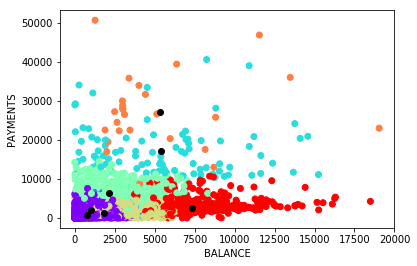

In [27]:
#scatterplot of PURCHASES AND CREDIT_LIMIT with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df_model2['BALANCE'], df_model2['PAYMENTS'], c=df_model2['CLUSTERS'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,3], c='black')

plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')

Text(0, 0.5, 'CREDIT_LIMIT')

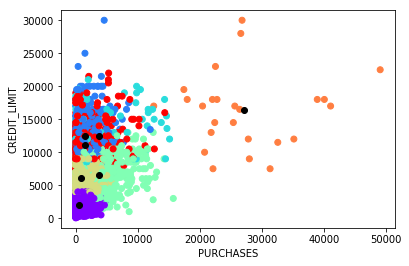

In [28]:
#scatterplot of PURCHASES AND CREDIT_LIMIT with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df_model2['PURCHASES'], df_model2['CREDIT_LIMIT'], c=df_model2['CLUSTERS'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='black')

plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')

In [29]:
#predict category of new data point
kpred = [8562.135451,5632.794532,9565.023168,17564.795123,1345.965545]

#model thinks new data point belongs to upper-left cluster
print(kmeans.predict([kpred]))

[2]


Text(0, 0.5, 'PAYMENTS')

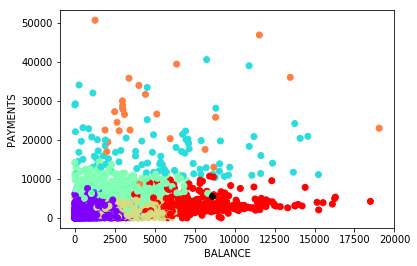

In [32]:
#scatterplot of PURCHASES AND CREDIT_LIMIT with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df_model2['BALANCE'], df_model2['PAYMENTS'], c=df_model2['CLUSTERS'], cmap='rainbow')

#new data point is the black dot
plt.scatter(kpred[0],kpred[1],c='black')

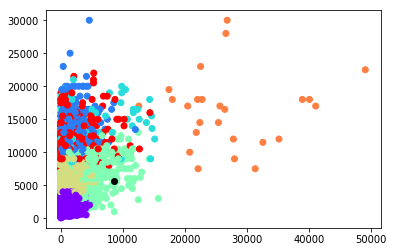

In [33]:
#scatterplot of PURCHASES AND CREDIT_LIMIT with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df_model2['PURCHASES'], df_model2['CREDIT_LIMIT'], c=df_model2['CLUSTERS'], cmap='rainbow')

#plot x, y axis coordinates for centroids
#new data point is the black dot
plt.scatter(kpred[0],kpred[1],c='black')